# Analysis of Complex Networks 
## Assignment 3 (Group 6)
### Student: André Dussing  ID: 018113442F 

Github: https://github.com/andreunilux/Complex-Networks check for change

In [26]:
# import necessary libraries
import networkx as nx
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import random

At first we set the path according to our dataset we are using (here Group6)


1. Facebook-Ego 
2. Twitter-Ego

In [27]:
path = "exercise_complex_network/Datasets/Group6"
path_facebook = os.path.join(path,"Facebook-Ego", "1684.edges" ) # 1. Facebook-Ego
path_twitter =  os.path.join(path,"Twitter-Ego", "2029971.edges" ) # 2. Twitter-Ego
# Now we read the edge list from the file and create the graph with NetworkX


facebook_graph = nx.read_edgelist(path_facebook, nodetype=int) # Undirected
twitter_graph = nx.read_edgelist(path_twitter, nodetype=int, create_using=nx.DiGraph()) #Directed




### (a) Generate graphs based on Watts-Strogatz Model, and each of them should have the same number of nodes as Facebook-Ego. Please generate 9 graphs with three different values of ¯k and p. Please plot the graph structures, degree distributions, and clustering coefficients as well

1. Facebook (Undirected)

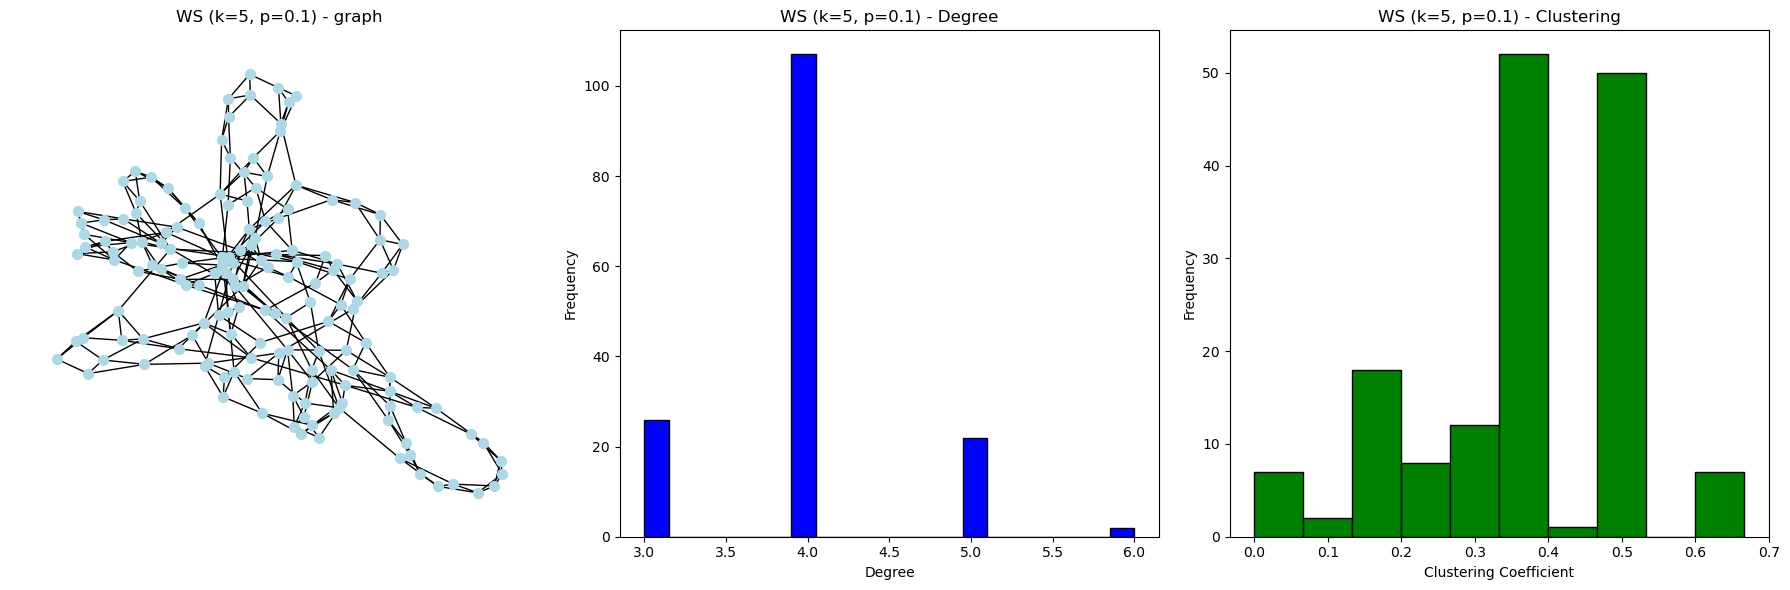

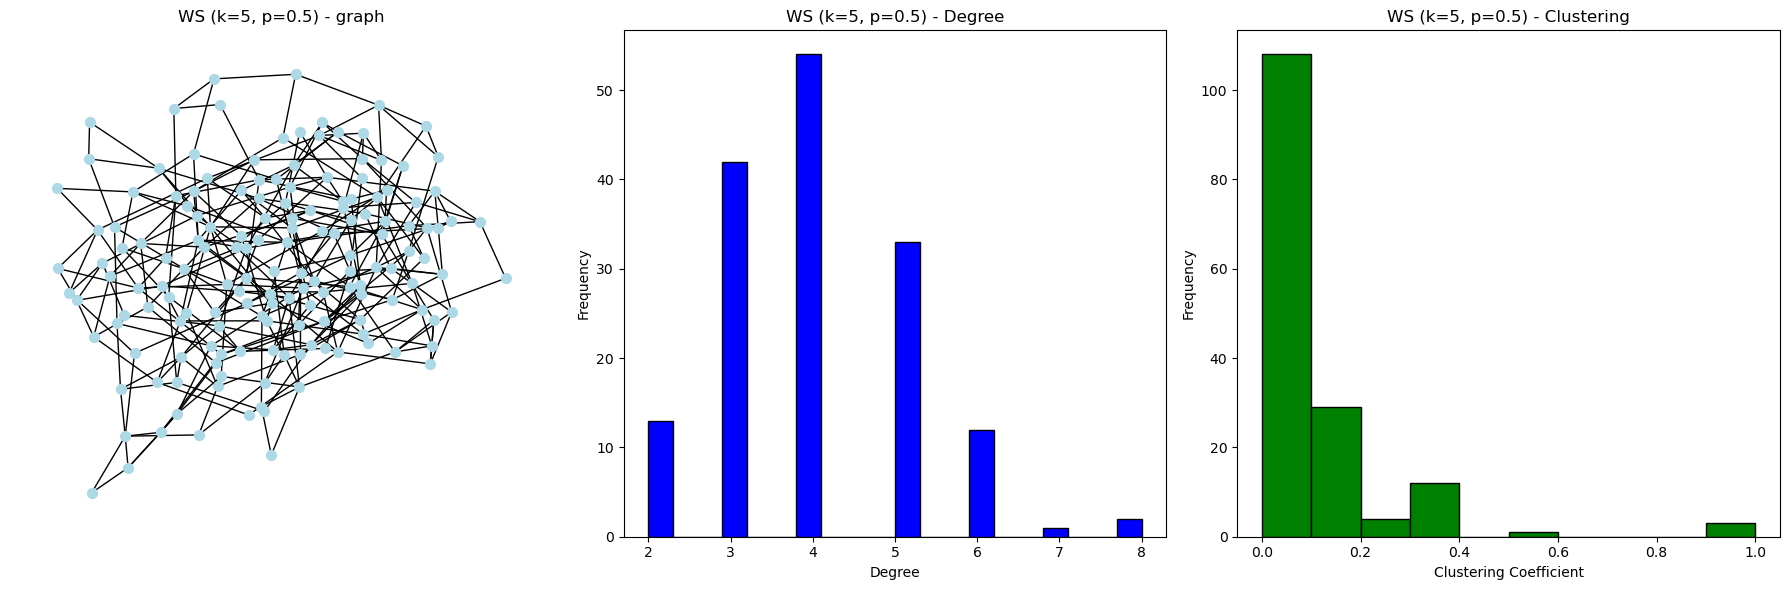

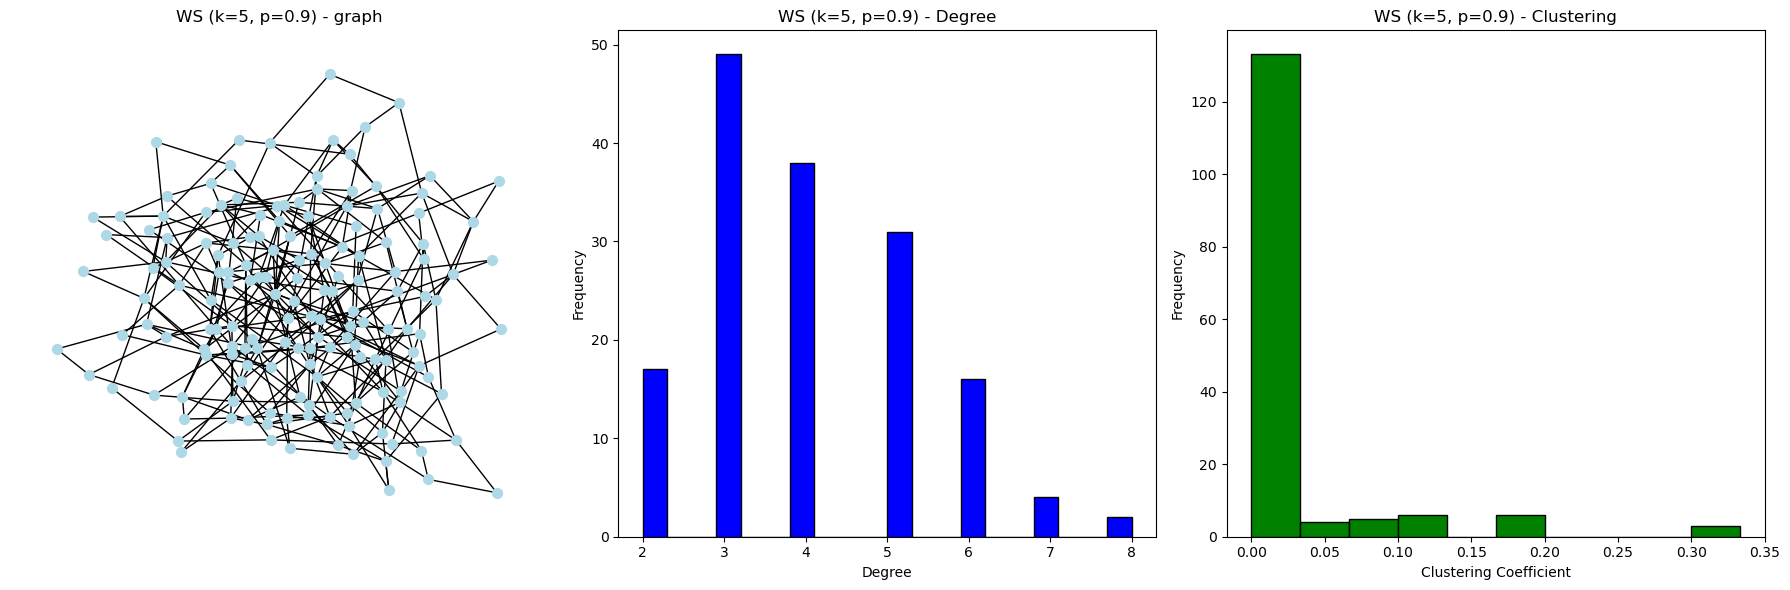

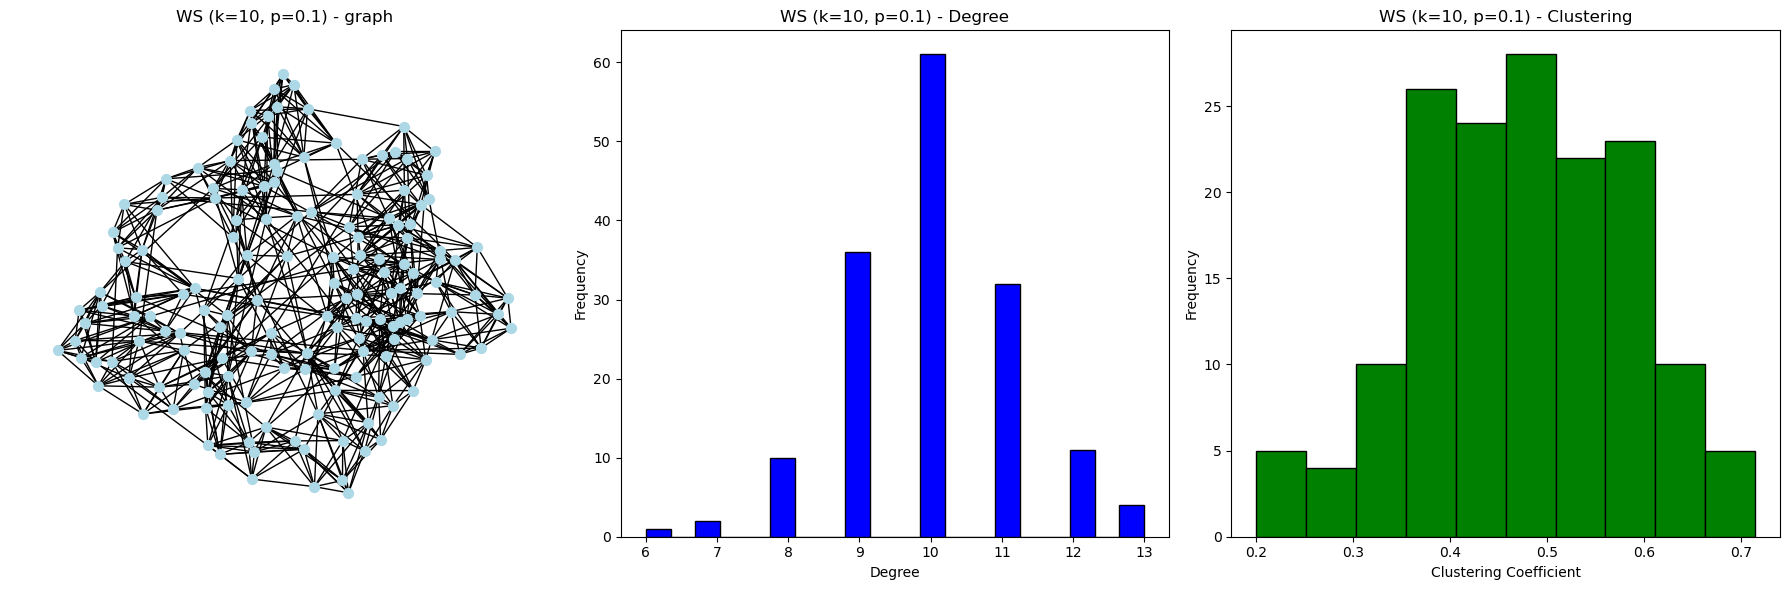

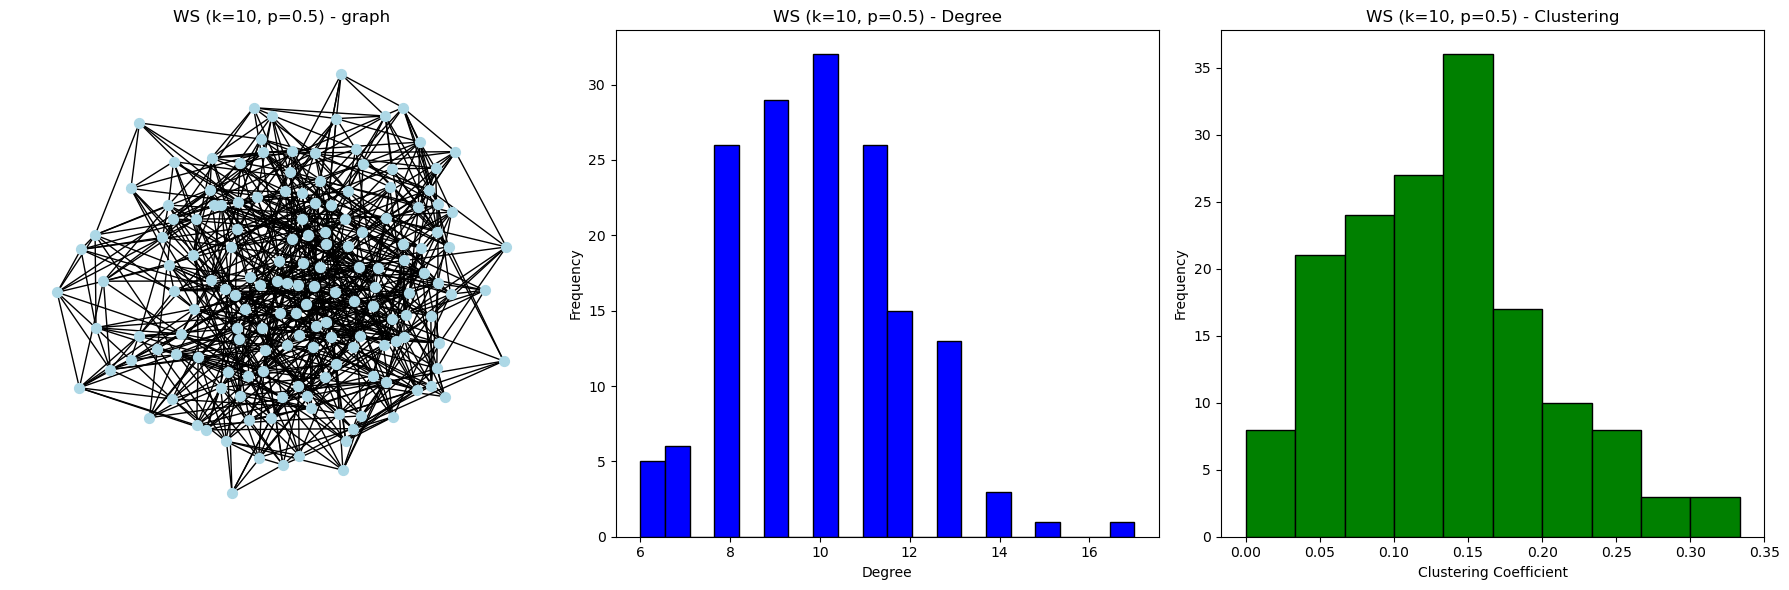

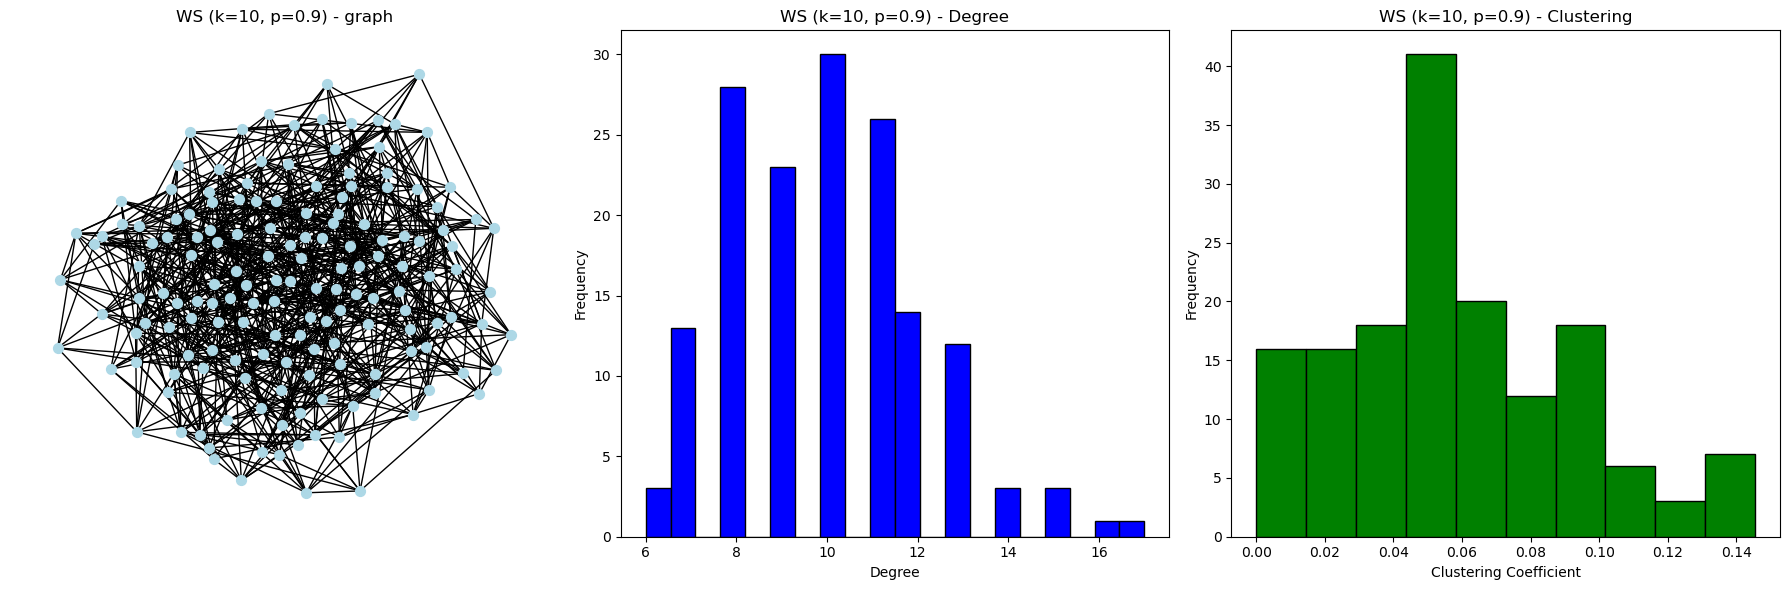

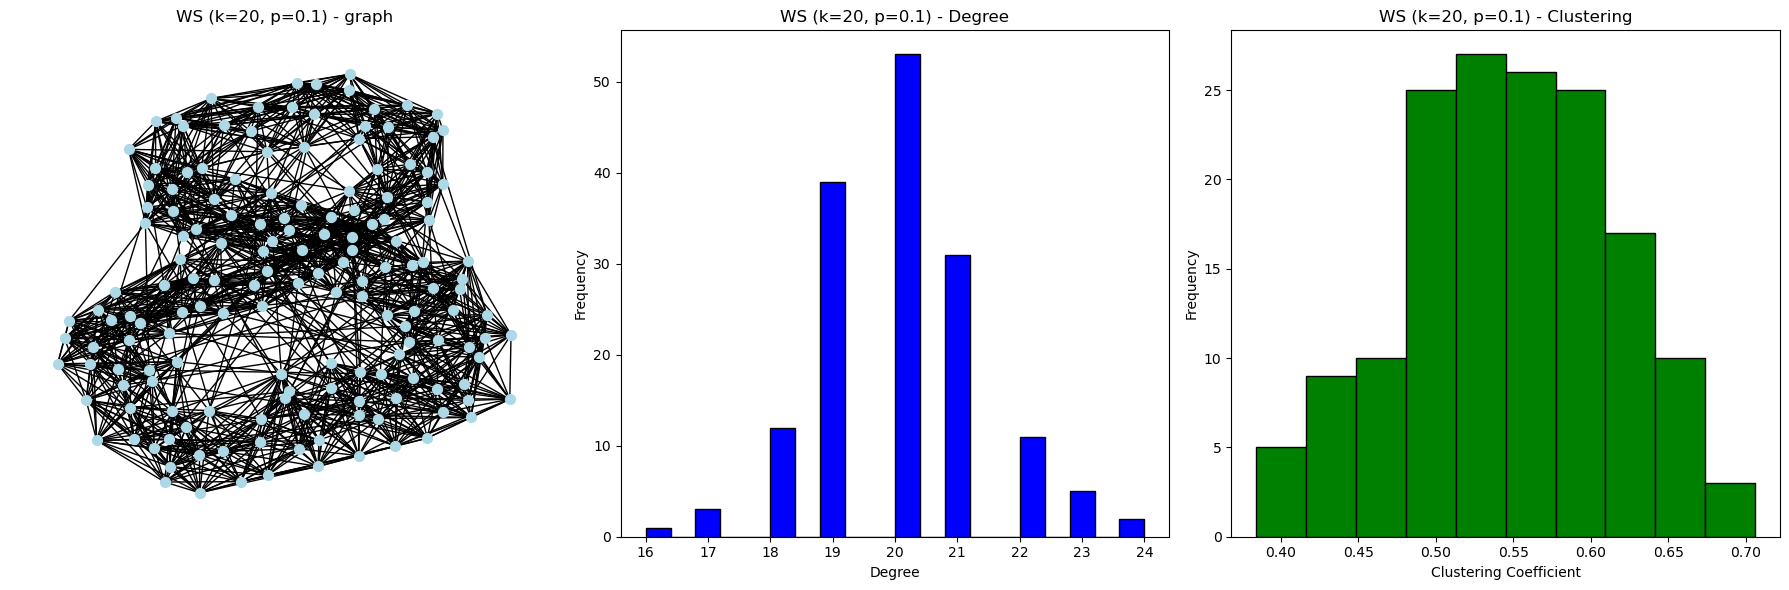

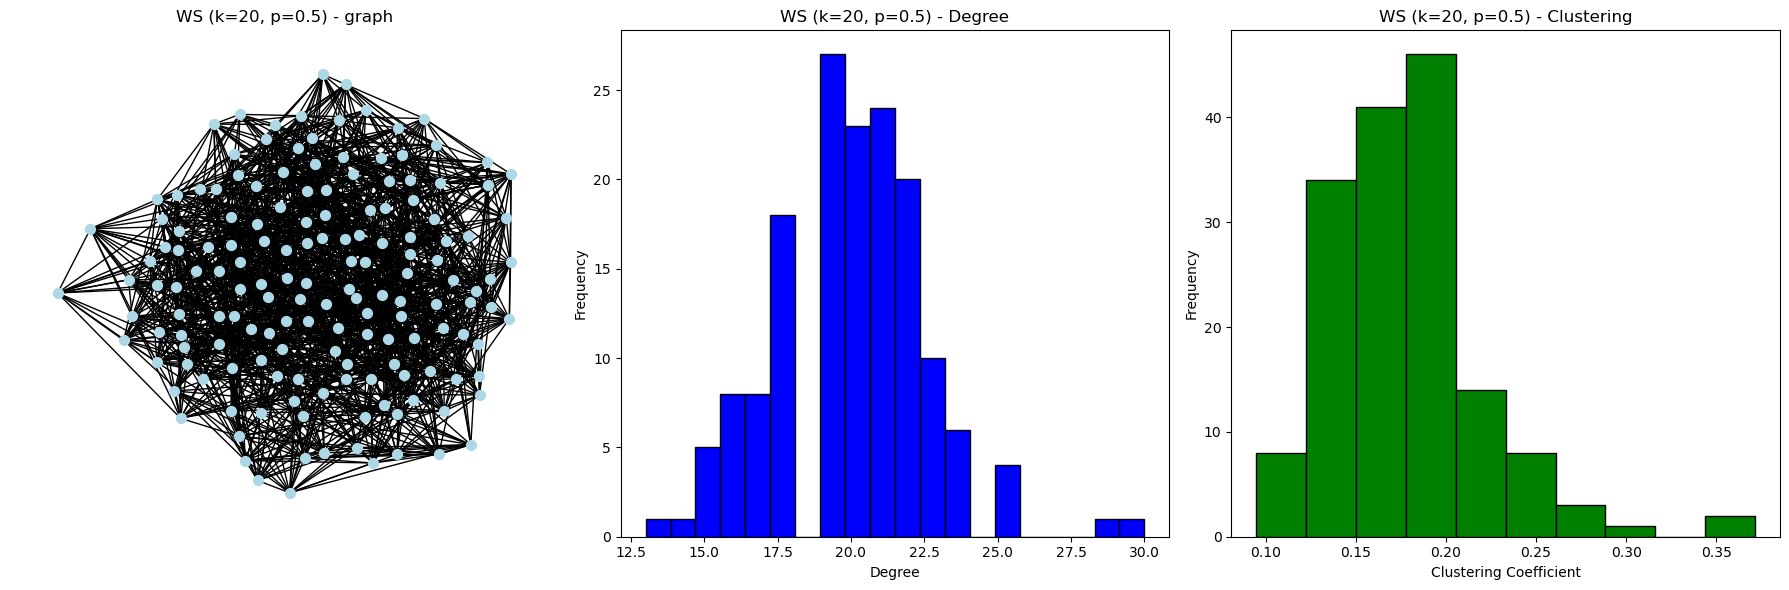

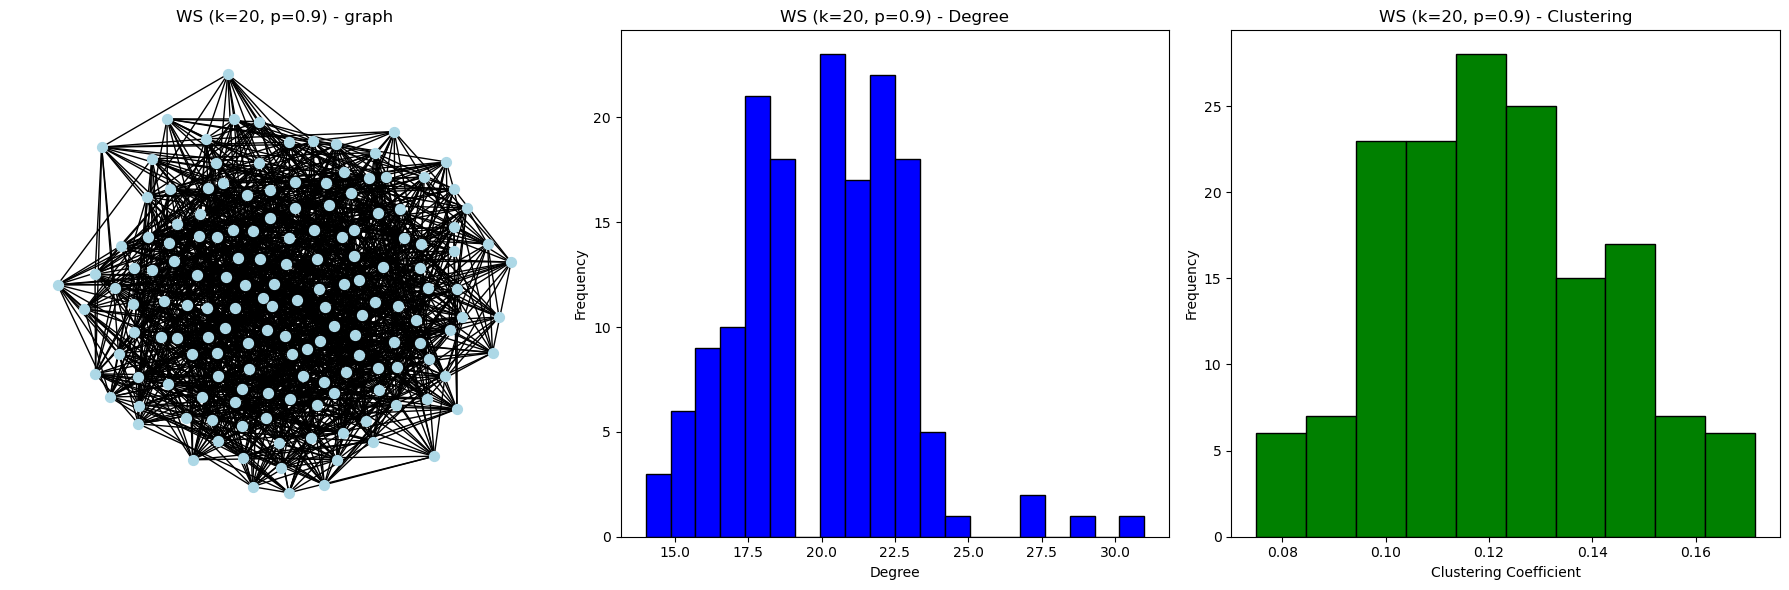

In [33]:
# Watts-Strogatz Model
num_nodes = facebook_graph.number_of_nodes()  
ks = [5, 10, 20]  # Different average degrees (nearest neighbors)
ps = [0.1, 0.5, 0.9]  # Different rewiring probabilities


def plot_graph(graph, title):
    plt.figure(figsize=(18, 6))

    # Plot graph structure
    plt.subplot(1, 3, 1)
    nx.draw(graph, node_size=50, node_color="lightblue", with_labels=False)
    plt.title(f"{title} - graph")

    # Plot degree distribution
    degrees = [d for _, d in graph.degree()]
    plt.subplot(1, 3, 2)
    plt.hist(degrees, bins=20, color='blue', edgecolor='black')
    plt.title(f"{title} - Degree")
    plt.xlabel("Degree")
    plt.ylabel("Frequency")

    # Plot clustering coefficient
    clustering_coeffs = list(nx.clustering(graph).values())
    plt.subplot(1, 3, 3)
    plt.hist(clustering_coeffs, bins=10, color='green', edgecolor='black')
    plt.title(f"{title} - Clustering")
    plt.xlabel("Clustering Coefficient")
    plt.ylabel("Frequency")

    plt.tight_layout()
    plt.show()

# Generate and plot Watts-Strogatz graphs
for k in ks:
    for p in ps:
        ws_graph = nx.watts_strogatz_graph(num_nodes, k, p)
        plot_graph(ws_graph, f"WS (k={k}, p={p})")


### (b) Generate scale-free graphs, and each of them should have the same number of nodes as Facebook-Ego. Please generate 3 graphs with three different values of γ. Please plot the graph structures,degree distributions, and clustering coefficients as well

alpha+beta+gamma=1.0
alpha+beta+gamma=1.0
alpha+beta+gamma=1.0
[[0.09117392450790701, 0.05408893685106724, 0.8547371386410257], [0.3067451759214076, 0.12212812333468048, 0.5711267007439119], [0.4734910958691876, 0.055107643913456024, 0.4714012602173564]]


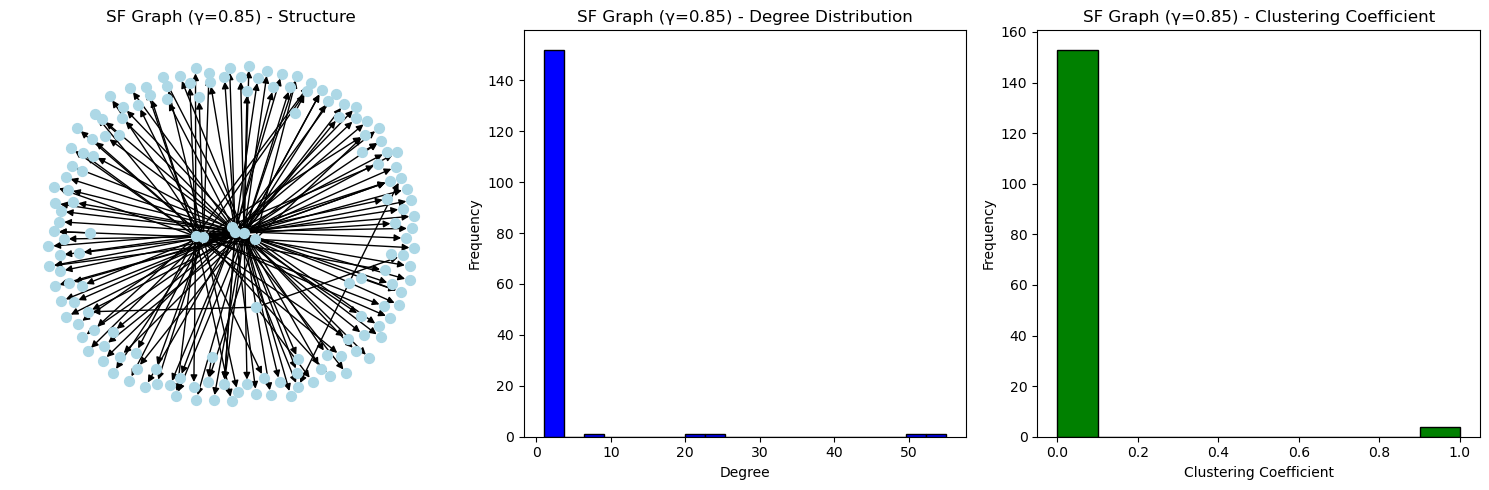

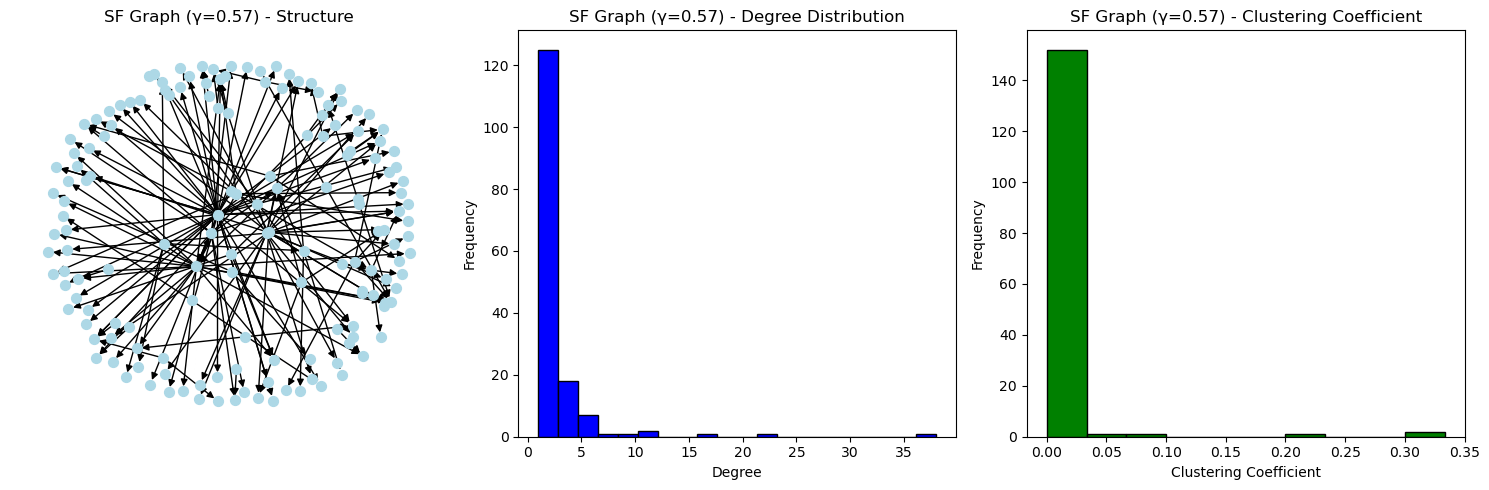

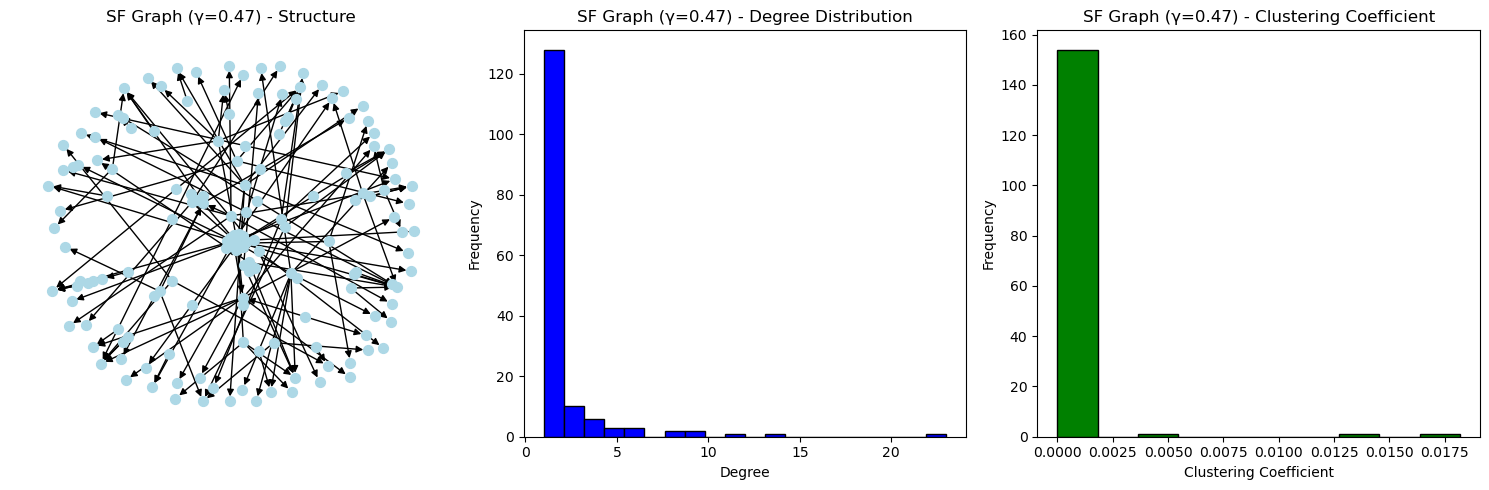

In [29]:
import random
#The sum of alpha, beta, and gamma must be 1.
alphas= []
betas= []
gammas = []
input = []


for i in range(3):
    gammas.append(random.random())
    betas.append(random.uniform(0,1-gammas[i]))
    alphas.append(1-gammas[i]-betas[i])
    input.append([alphas[i],betas[i],gammas[i]])
    print("alpha+beta+gamma="+ str(alphas[i]+betas[i]+gammas[i]) )

print(input)



def plot_scale_free_graphs(a,b,g):
    # Generate scale-free graph
    sf_graph = nx.scale_free_graph(num_nodes,alpha=a, beta=b, gamma=g)

    # Draw the graph structure
    plt.figure(figsize=(15, 5))

    # Graph structure
    plt.subplot(1, 3, 1)
    nx.draw(sf_graph, node_size=50, node_color="lightblue", with_labels=False)
    plt.title(f"SF Graph (γ={g:.2f}) - Structure")

    # Degree distribution
    degrees = [d for _, d in sf_graph.degree()]
    plt.subplot(1, 3, 2)
    plt.hist(degrees, bins=20, color='blue', edgecolor='black')
    plt.title(f"SF Graph (γ={g:.2f}) - Degree Distribution")
    plt.xlabel("Degree")
    plt.ylabel("Frequency")

    # Clustering coefficient
    clustering_coeffs = list(nx.clustering(nx.Graph(sf_graph)).values())
    plt.subplot(1, 3, 3)
    plt.hist(clustering_coeffs, bins=10, color='green', edgecolor='black')
    plt.title(f"SF Graph (γ={g:.2f}) - Clustering Coefficient")
    plt.xlabel("Clustering Coefficient")
    plt.ylabel("Frequency")

    plt.tight_layout()
    plt.show()

# Generate and plot scale-free graphs
for a,b,g in input:
    plot_scale_free_graphs(a,b,g)


### (c) Generate graphs based on Barab´asi-Albert Model, and each of them should have the same number of nodes as Facebook-Ego. Please generate 9 graphs with three different values of m0 and m. Please plot the graph structures, degree distributions, and clustering coefficients as well

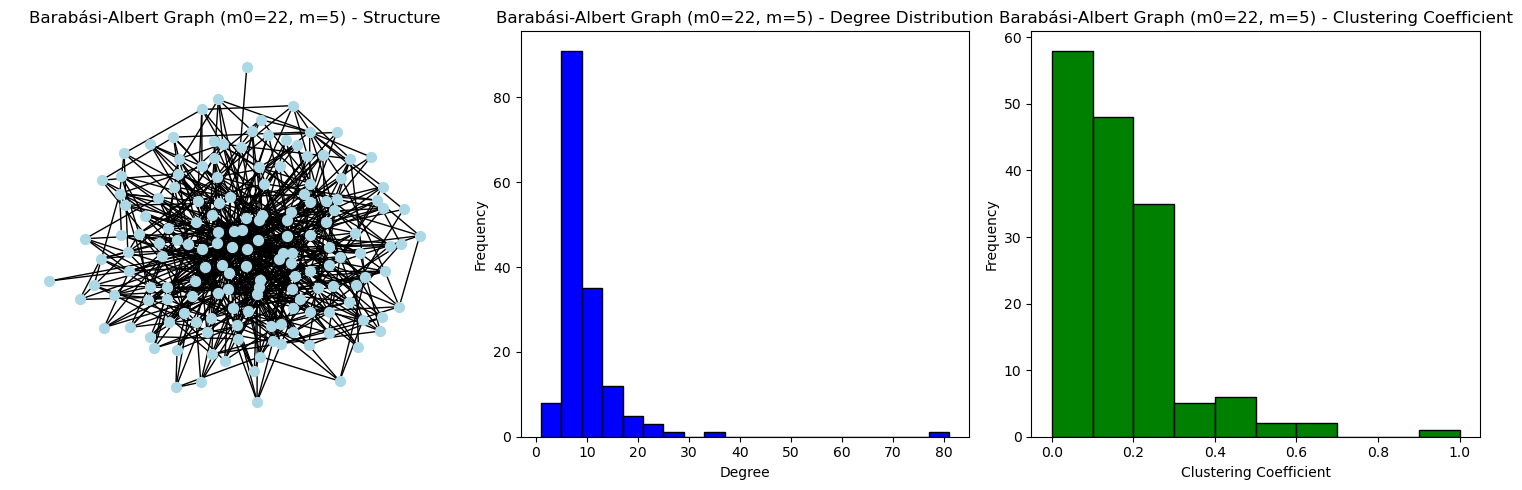

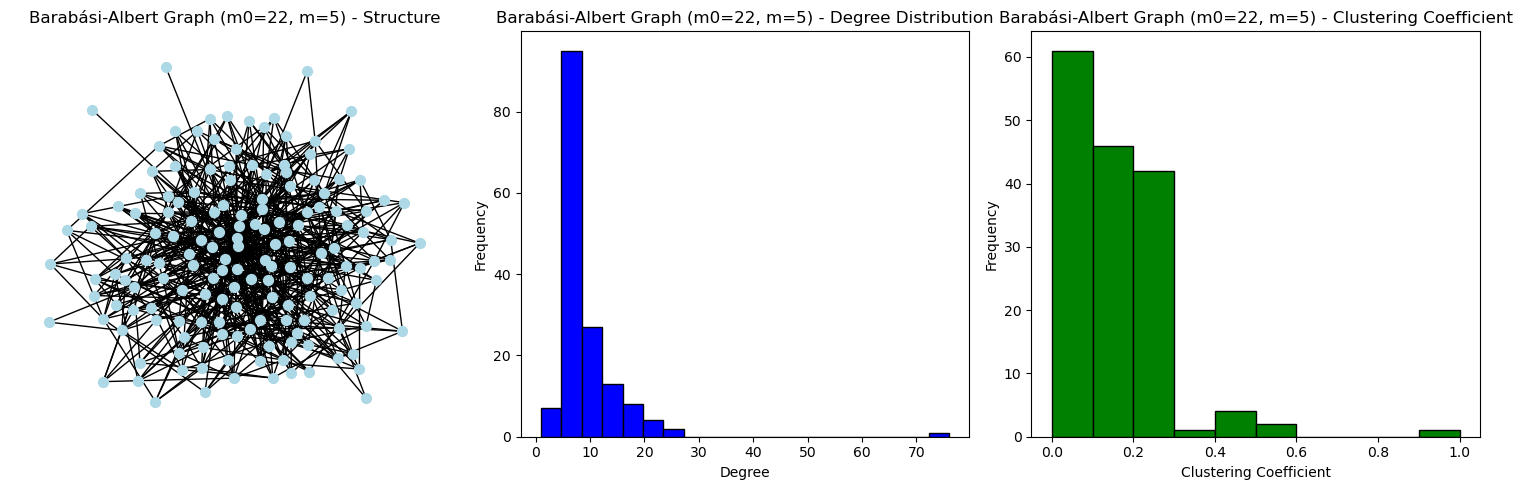

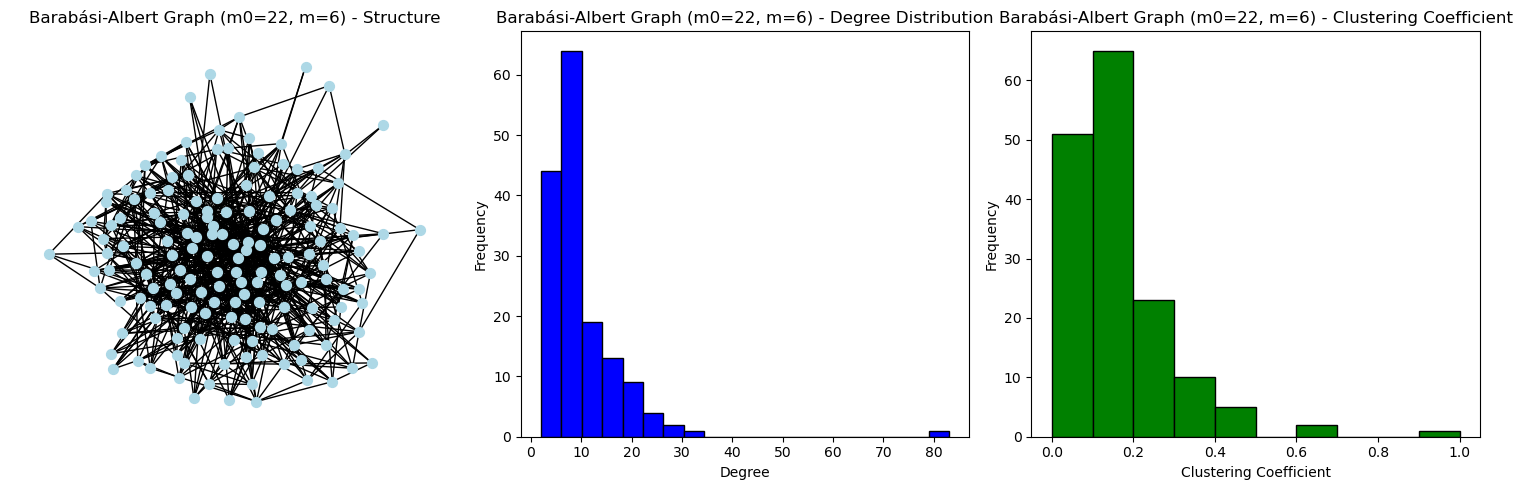

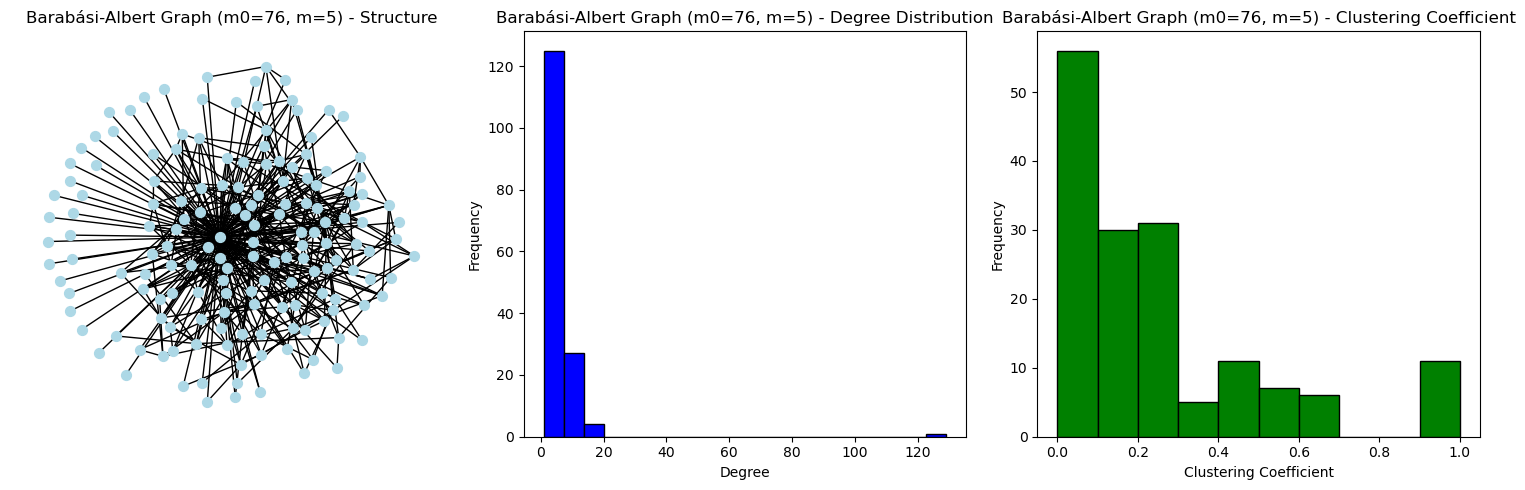

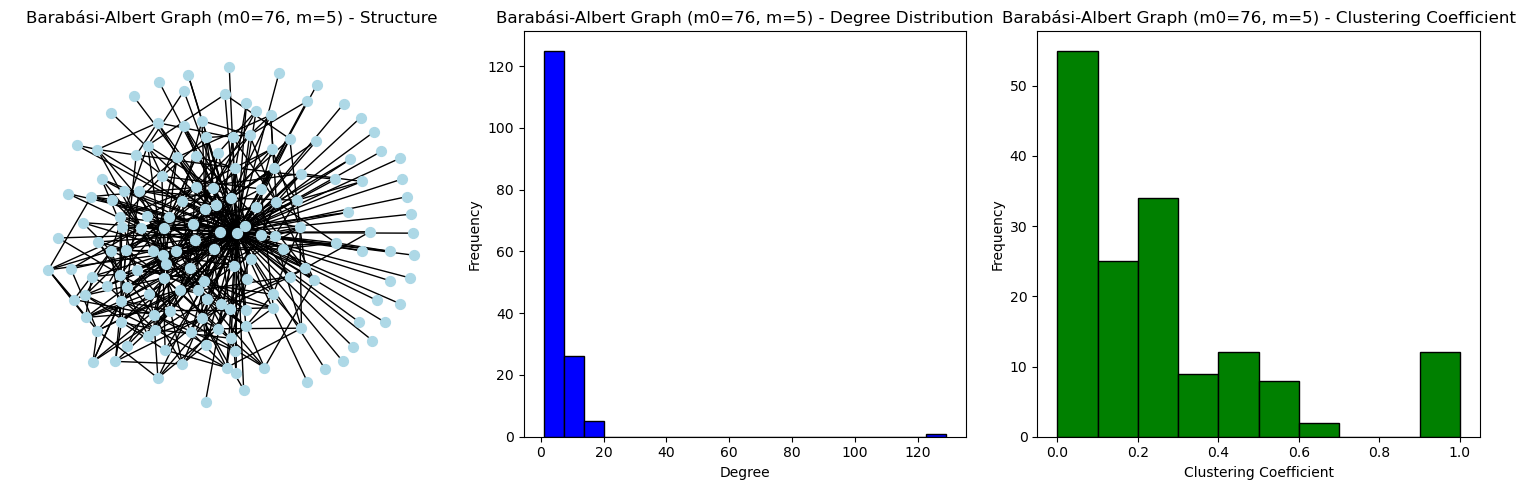

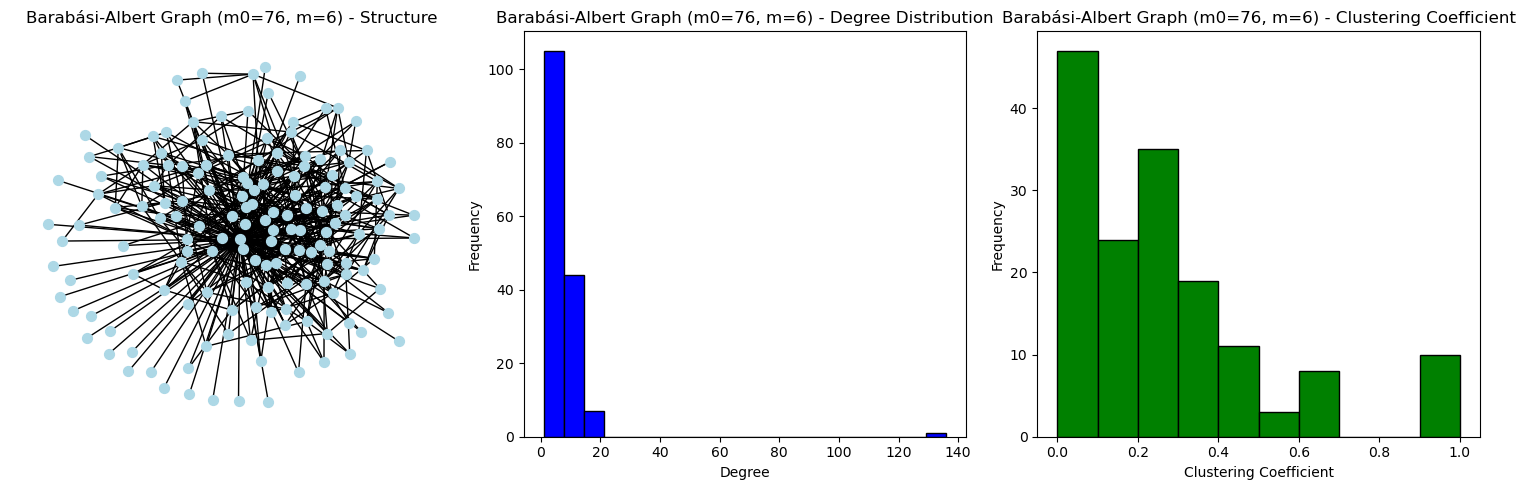

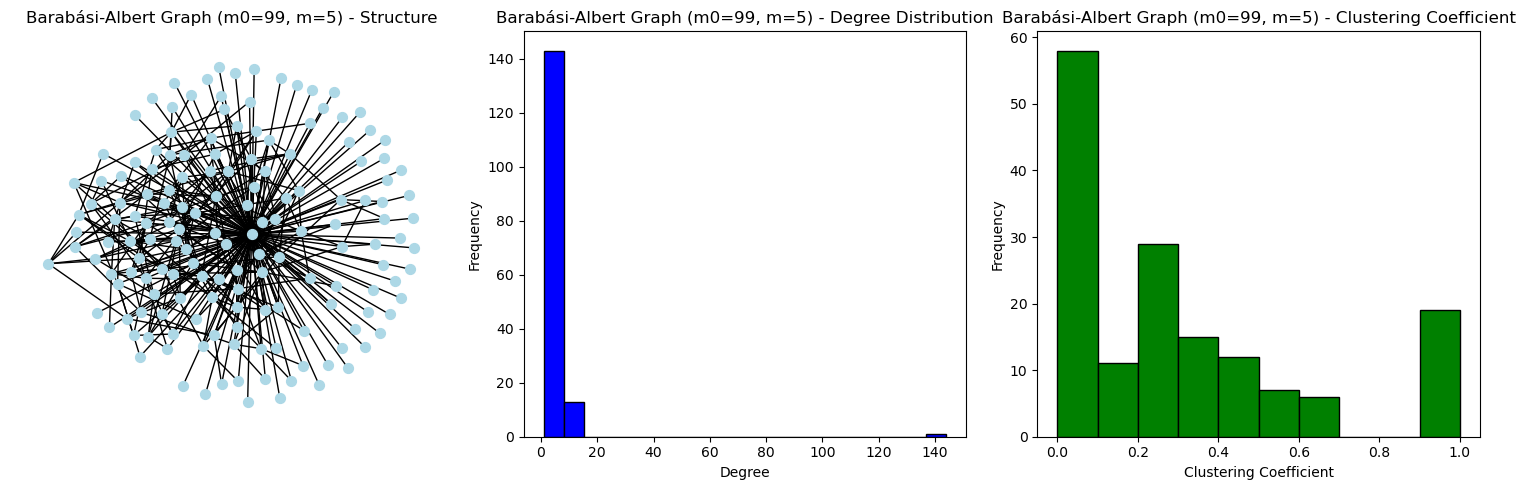

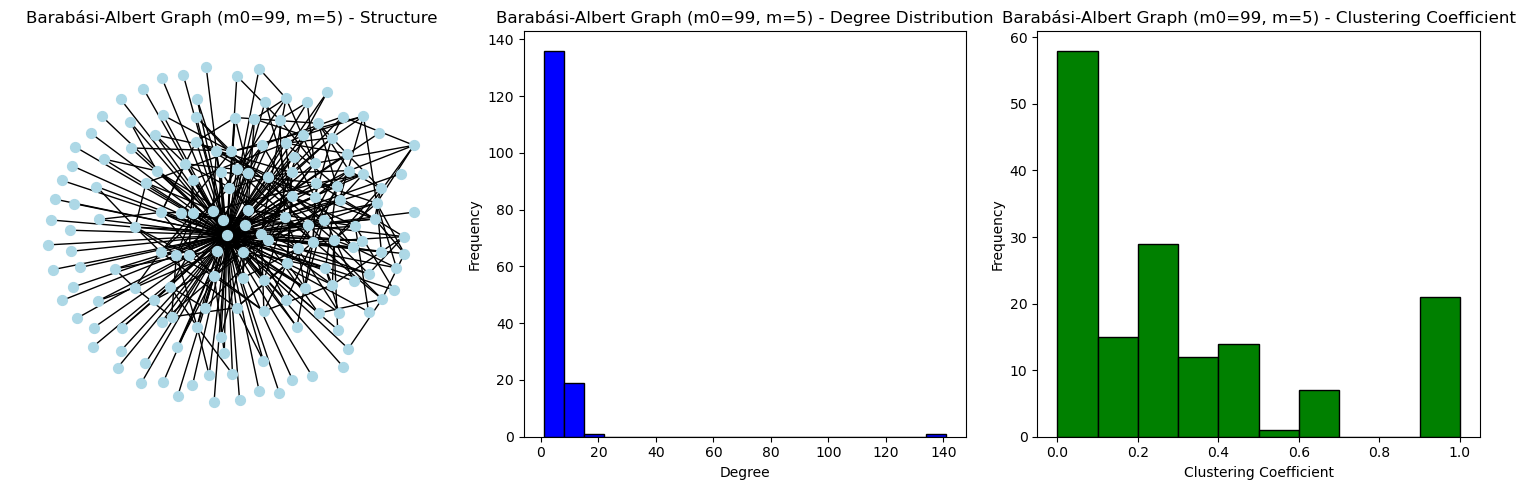

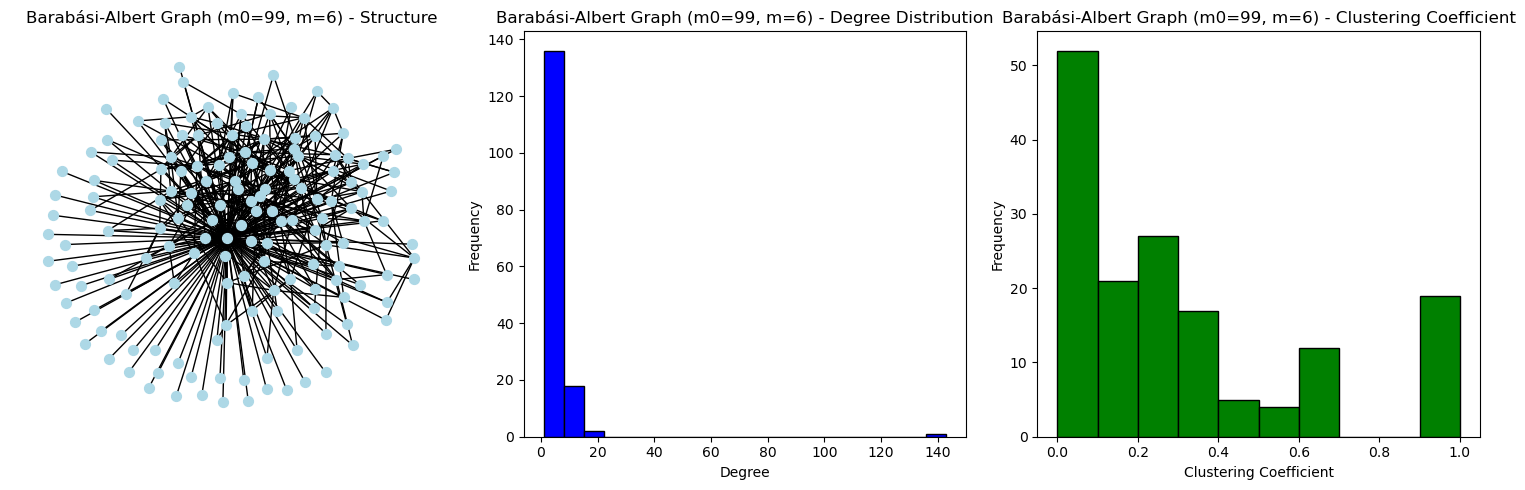

In [30]:
num_nodes = facebook_graph.number_of_nodes()  

# Different values of m0 (initial nodes) and m (edges per node)
#m has to be 1 <= m < n
#m0 has to be m <= m0 <= n


m0_values = np.random.uniform(1,num_nodes,3)
m_values = np.random.uniform(1,np.min(m0_values),3)

# Function to plot graph structure, degree distribution, and clustering coefficient
def plot_barabasi_albert_graph(m0, m):
    # Generate Barabasi-Albert graph
    initial_graph = nx.star_graph(m0) 
    ba_graph = nx.barabasi_albert_graph(n=num_nodes, m=m, initial_graph=initial_graph)
    
    # Draw the graph structure
    plt.figure(figsize=(15, 5))

    # Graph structure
    plt.subplot(1, 3, 1)
    nx.draw(ba_graph, node_size=50, node_color="lightblue", with_labels=False)
    plt.title(f"Barabási-Albert Graph (m0={m0}, m={m}) - Structure")

    # Degree distribution
    degrees = [d for _, d in ba_graph.degree()]
    plt.subplot(1, 3, 2)
    plt.hist(degrees, bins=20, color='blue', edgecolor='black')
    plt.title(f"Barabási-Albert Graph (m0={m0}, m={m}) - Degree Distribution")
    plt.xlabel("Degree")
    plt.ylabel("Frequency")

    # Clustering coefficient
    clustering_coeffs = list(nx.clustering(ba_graph).values())
    plt.subplot(1, 3, 3)
    plt.hist(clustering_coeffs, bins=10, color='green', edgecolor='black')
    plt.title(f"Barabási-Albert Graph (m0={m0}, m={m}) - Clustering Coefficient")
    plt.xlabel("Clustering Coefficient")
    plt.ylabel("Frequency")

    plt.tight_layout()
    plt.show()

# Generate and plot Barabási-Albert graphs for different m0 and m values
for m0 in m0_values:
    for m in m_values:
        plot_barabasi_albert_graph(int(m0), int(m))


### (d) Please compare your Facebook-Ego network, Twitter-Ego network with the generated random graphs in (a), (b) and (c). Which random graph(s) approximates your networks at most? Why?

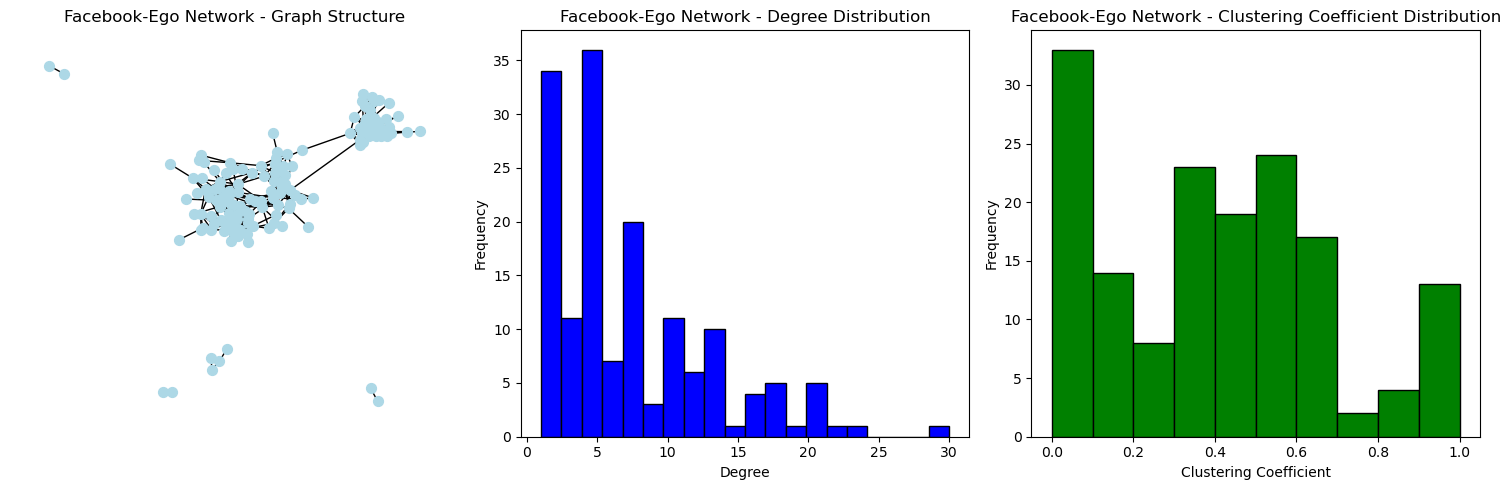

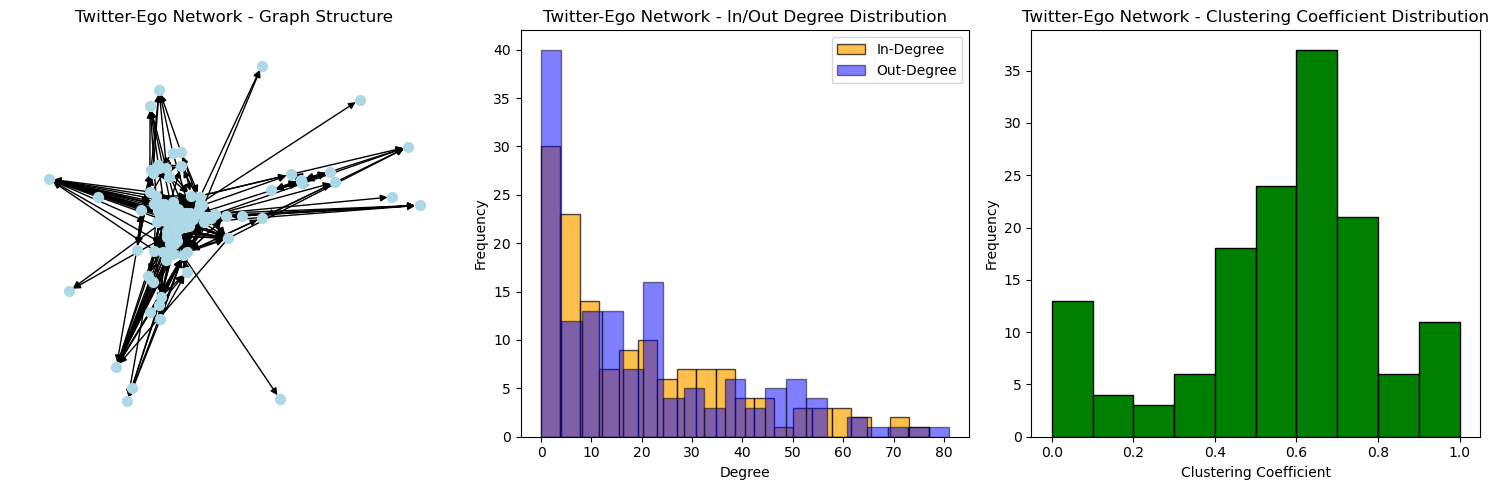

In [31]:


def plot_network_statistics(graph, graph_name, is_directed=False):
    """
    Plots the graph structure, degree distribution, and clustering coefficients for a given network.
    """
    plt.figure(figsize=(15, 5))

    # 1. Graph structure
    plt.subplot(1, 3, 1)
    nx.draw(graph, node_size=50, node_color="lightblue", with_labels=False)
    plt.title(f"{graph_name} - Graph Structure")

    # 2. Degree Distribution
    
    
    # If directed, separate in-degree and out-degree distributions
    if is_directed:
        in_degrees = [d for _, d in graph.in_degree()]
        out_degrees = [d for _, d in graph.out_degree()]

        plt.subplot(1, 3, 2)
        plt.hist(in_degrees, bins=20, color='orange', edgecolor='black', alpha=0.7, label="In-Degree")
        plt.hist(out_degrees, bins=20, color='blue', edgecolor='black', alpha=0.5, label="Out-Degree")
        plt.title(f"{graph_name} - In/Out Degree Distribution")
        plt.xlabel("Degree")
        plt.ylabel("Frequency")
        plt.legend()
    else:
        degrees = [d for _, d in graph.degree()]
        plt.subplot(1, 3, 2)
        plt.hist(degrees, bins=20, color='blue', edgecolor='black')
        plt.title(f"{graph_name} - Degree Distribution")
        plt.xlabel("Degree")
        plt.ylabel("Frequency")

    # 3. Clustering Coefficients
    if not is_directed:
        clustering_coeffs = list(nx.clustering(graph).values())
    else:
        clustering_coeffs = list(nx.clustering(graph.to_undirected()).values()) 

    plt.subplot(1, 3, 3)
    plt.hist(clustering_coeffs, bins=10, color='green', edgecolor='black')
    plt.title(f"{graph_name} - Clustering Coefficient Distribution")
    plt.xlabel("Clustering Coefficient")
    plt.ylabel("Frequency")

    plt.tight_layout()
    plt.show()

# Plot Facebook-Ego network
plot_network_statistics(facebook_graph, "Facebook-Ego Network")

# Plot Twitter-Ego network (Directed graph)
plot_network_statistics(twitter_graph, "Twitter-Ego Network", is_directed=True)


Let's break down the comparison of each network characteristic:
1. Degree Distribution:

    Facebook and Twitter Networks: Both networks show a broad degree distribution, skewed to the left. This indicates that most nodes have relatively few connections (low degree), while a small number of nodes serve as hubs with a much higher degree.
        Watts-Strogatz Model: The degree distribution here tends to follow a Poisson-like distribution, where most nodes have a degree around the average, with few extremes. However, with certain parameters (low kk, high pp), this model can produce distributions similar to Facebook and Twitter, with hubs forming at random.
        Scale-Free Model: The degree distribution follows a power-law, meaning many nodes have a small degree and a few have a very large degree. This matches Twitter and Facebook networks fairly well, as both have hubs.
        Barabási-Albert Model: Also follows a power-law distribution. It shares similar features with the Scale-Free model in terms of having many nodes with small degrees and a few hubs. This model can represent the hub formation in the real networks, but without the same clustering properties.

2. Clustering Coefficient:

    Facebook and Twitter Networks: Both networks exhibit a relatively high clustering coefficient, especially in Facebook. Most nodes have coefficients around 0.5 to 0.6, indicating that the neighbors of nodes are also likely to be connected, forming tightly-knit groups.
        Watts-Strogatz Model: This model naturally produces networks with high clustering, particularly when the rewiring probability pp is low. This makes it a strong candidate for approximating the local clustering behavior seen in Facebook and Twitter.
        Scale-Free Model: This model tends to have a very low clustering coefficient, with most nodes having near-zero clustering, because hubs connect to many nodes, but those nodes are not interconnected.
        Barabási-Albert Model: The clustering coefficient here is generally low but not as extreme as in the Scale-Free model. The hubs in this model dominate the connections, and while there can be some clustering, it's not as pronounced as in Facebook or Twitter.

The Watts-Strogatz model seems to be the best approximation of both Facebook-Ego and Twitter-Ego networks overall. It captures the essential characteristics of both networks, including high clustering and the presence of hubs (with suitable parameters).